# Statistická úloha

## Import dat a normalizace

In [4]:
import numpy as np
import pandas as pd

literacy = pd.read_csv('./data/countries_of_the_world/countries_of_the_world.csv', dtype={"Literacy (%)": np.float16}, decimal=',')
literacy["Country"] = literacy["Country"].apply(lambda x: x.strip()) # normalize names

happiness = pd.read_csv('./data/world_happiness/2019.csv', dtype={"Score": np.float32})
happiness["Country or region"] = happiness["Country or region"].apply(lambda x: x.strip()) # normalize names

## Sloučení tabulek

In [5]:
merged = pd.merge(literacy, happiness, how="inner", left_on="Country", right_on="Country or region")
filtered = merged[~np.isnan(merged["Literacy (%)"]) & ~np.isnan(merged["Score"])] # ignore nan values

Nyní si data vizualizujme.

<AxesSubplot:xlabel='Score', ylabel='Literacy (%)'>

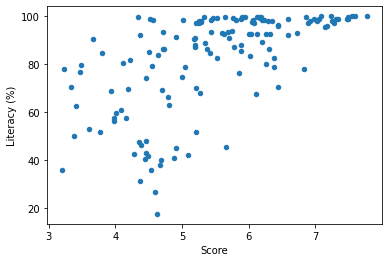

In [6]:
merged.plot.scatter(x="Score", y="Literacy (%)")

Proveďme lineární regresi.

In [9]:
from scipy import stats

x=filtered["Score"]
y=filtered["Literacy (%)"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope:", slope)
print("intercept:", intercept)
print("r-value:", r_value)
print("p-value:", p_value)
print("std-err:", std_err)
trust = 0.05
print(f"p < {trust}:", p_value < trust)

slope: 11.196365594859222
intercept: 20.44058866497076
r-value: 0.6049654007597115
p-value: 1.944212907965511e-15
std-err: 1.2499410712113799
p < 0.05: True


Vizualizujme výsledky lineární regrese.

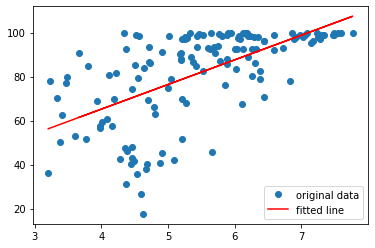

In [10]:
import matplotlib.pyplot as plt

plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()